In [1]:
import os
os.chdir('..')

Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  12
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  12
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  12
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  7
Solution found at iteration  6
Solution found at iteration  7
Solution found at iteration  12
Solution found at iteration  12
Solution found at iteration  10
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration

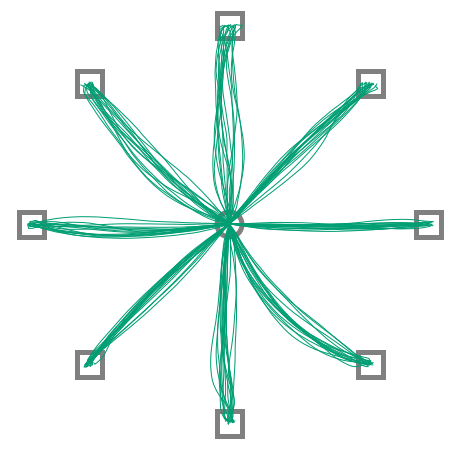

(np.float64(-16.502672616629855),
 np.float64(16.556124949226948),
 np.float64(28.5),
 np.float64(61.5))

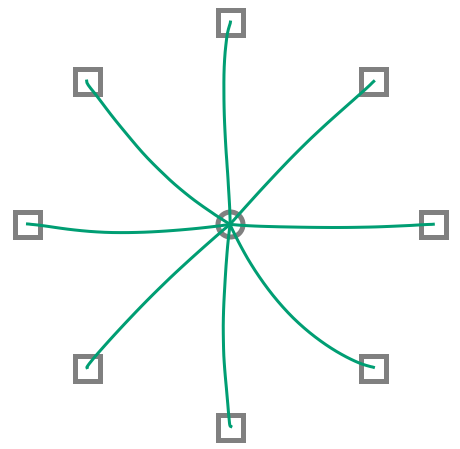

In [20]:


import sys
import os
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
XST = 0
YST = 45
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 30
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,100,.05,.1,tg,st,NumIteration,delay = 0.06,Noise=True)
        trajectories[num_sim,iter] = np.array([xILQG,yILQG]).T

        if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("ILQG_Centerout.svg",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")


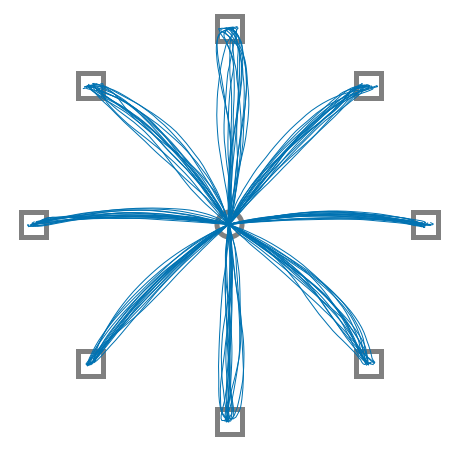

(np.float64(-16.500485880174505),
 np.float64(16.510203483664615),
 np.float64(28.480058389109924),
 np.float64(61.500949600518574))

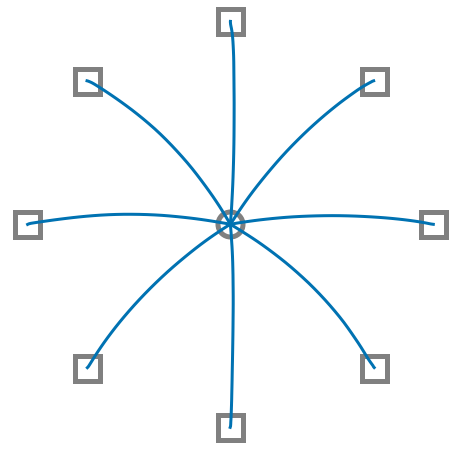

In [21]:


import sys
import os
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
YST = 45
XST = 0
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 50
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=100,w2=100,w3=.05,w4=.05,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = False)
        
        trajectories[num_sim,iter] = np.array([xFL,yFL]).T

        if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("FL_Centerout.svg",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

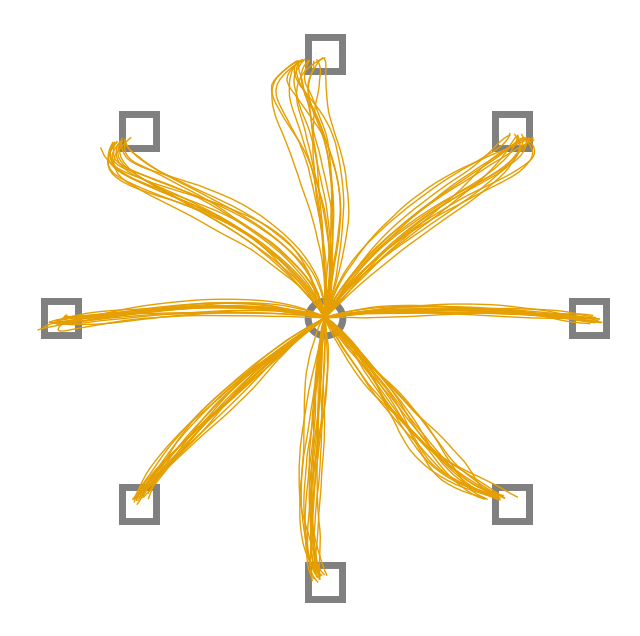

(np.float64(-16.934569981897674),
 np.float64(16.7789788613476),
 np.float64(28.5),
 np.float64(61.5))

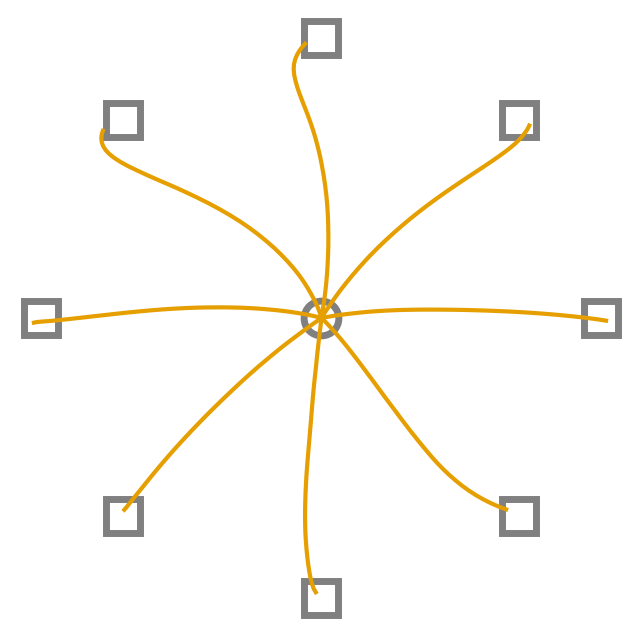

In [11]:


import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
YST= 45
XST = 0
st = [XST,YST]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 30
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [XST+cos(angles)*15,YST+sin(angles)*15]
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,w1=100,w2=100,w3=.05,w4=.05,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,motornoise_variance=1e-3)
        
        trajectories[num_sim,iter] = np.array([xLQG,yLQG]).T

        if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("DLQG_Centerout.svg",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [XST+cos(angles)*15,YST+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([XST],[YST],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

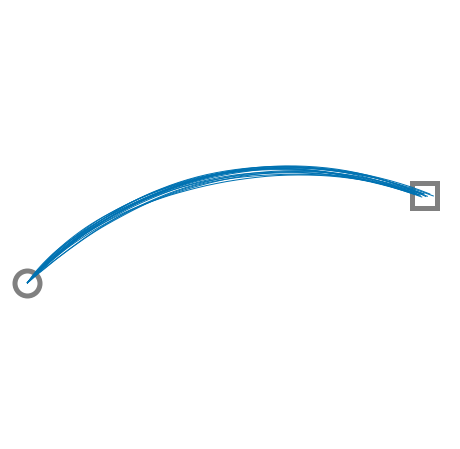

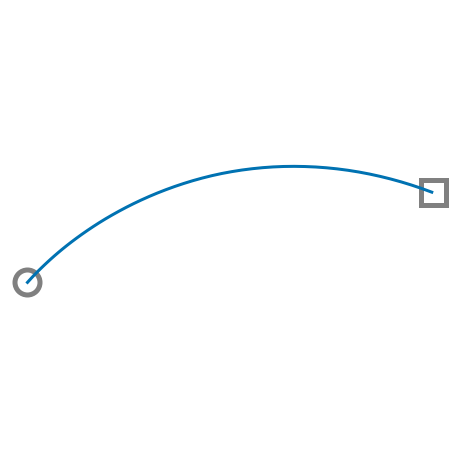

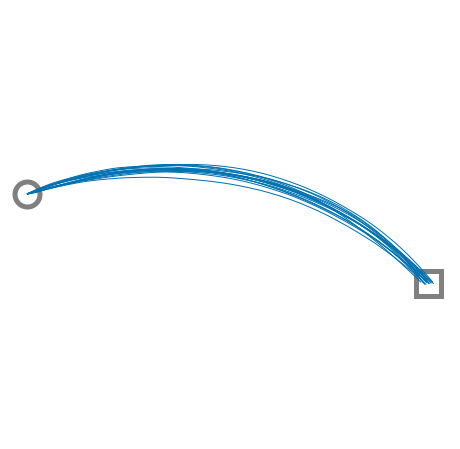

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.359900429488615),
 np.float64(43.44209098073907))

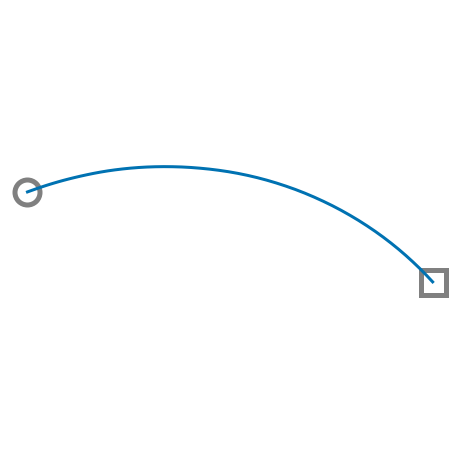

In [41]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

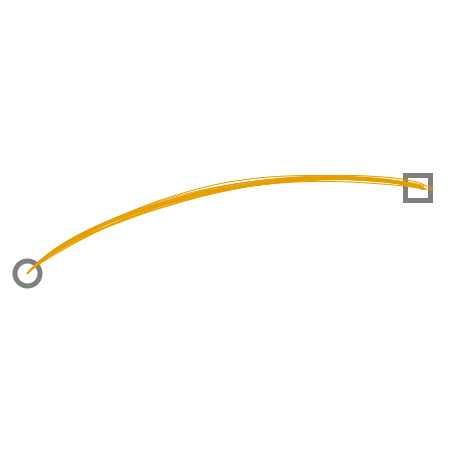

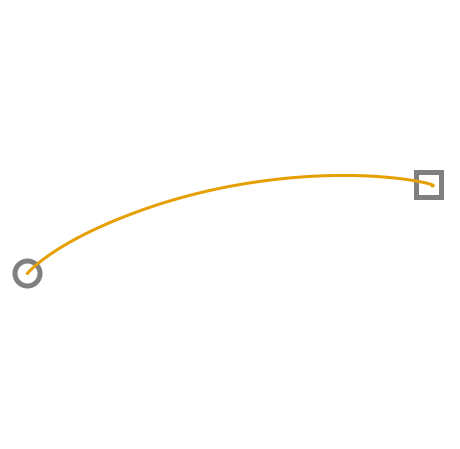

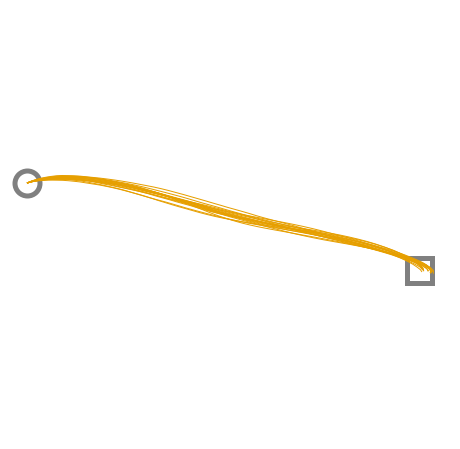

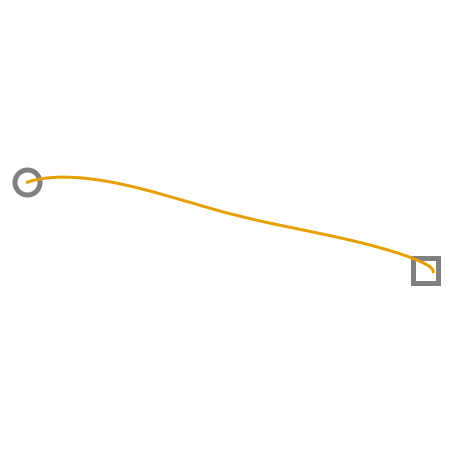

In [42]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8


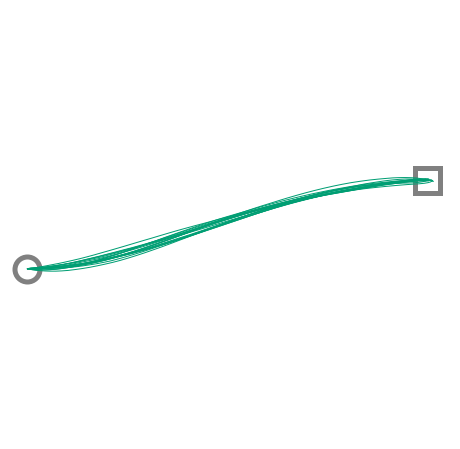

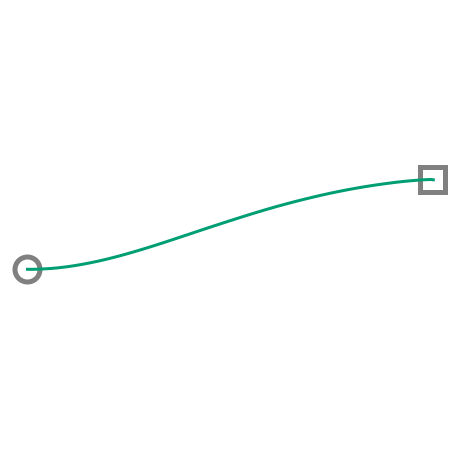

Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9


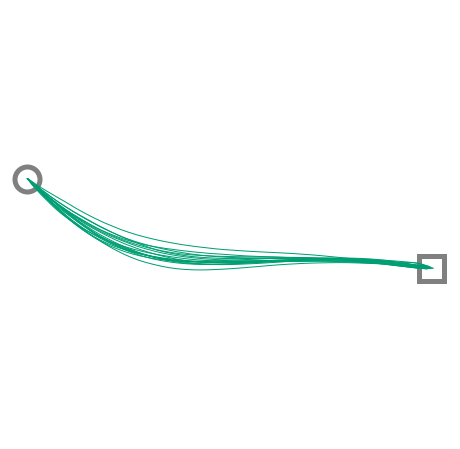

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.5),
 np.float64(40.50000000000001))

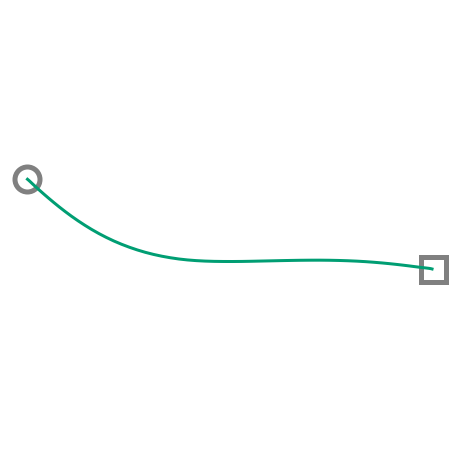

In [43]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

In [ ]:
print(ToCartesian(np.array([20,60])*pi/180))
print(ToCartesian(np.array([70,110])*pi/180))

print(compute_angles_from_cartesian(-20,30),compute_angles_from_cartesian(20,50))


(np.float64(33.921168486585955), np.float64(42.75926014917293))
(np.float64(-22.739395700229935), np.float64(28.190778623577252))
(np.float64(1.1273311120203477), np.float64(1.9262116888145653)) (np.float64(0.6149978935187046), np.float64(1.0926873644218285))


In [ ]:
def f(x, u):
    C = np.array(
        [-x[3] * (2 * x[2] + x[3]) * a2 * np.sin(x[1]), x[2] ** 2 * a2 * np.sin(x[1])]
    )

    Denominator = a3 * (a1 - a3) - a2**2 * np.cos(x[1]) ** 2
    Minv = np.array(
        [
            [a3 / Denominator, (-a2 * np.cos(x[1]) - a3) / Denominator],
            [
                (-a2 * np.cos(x[1]) - a3) / Denominator,
                (2 * a2 * np.cos(x[1]) + a1) / Denominator,
            ],
        ]
    )
    A = np.array([[2, -2, 0, 0, 1.5, -2], [0, 0, 2, -2, 2, -1.5]])

    l0 = np.array([7.32, 3.26, 6.4, 4.26, 5.95, 4.04])
    theta0 = np.array(
        [
            [
                2 * pi / 360 * 15,
                2 * pi / 360 * 4.88,
                0,
                0,
                2 * pi / 360 * 4.5,
                2 * pi / 360 * 2.12,
            ],
            [
                0,
                0,
                2 * pi / 360 * 80.86,
                2 * pi / 360 * 109.32,
                2 * pi / 360 * 92.96,
                2 * pi / 360 * 91.52,
            ],
        ]
    )
    l = 1 + A[0] * (theta0[0] - x[0]) / l0 + A[1] * (theta0[1] - x[1]) / l0
    v = A[0] * (-x[2]) / l0 + A[1] * (-x[3]) / l0

    fl = np.exp(np.abs((l**1.55 - 1) / 0.81))

    ff_v = np.where(
        v <= 0,
        (-7.39 - v) / (-7.39 + (-3.21 + 4.17) * v),
        (0.62 - (-3.12 + 4.21 * l - 2.67 * l**2) * v) / (0.62 + v),
    )
    theta = Minv @ (A @ (u * fl * ff_v) - Bdyn @ x[2:4] - C)

    return np.array([[x[2], x[3], theta[0], theta[1], 0, 0]])

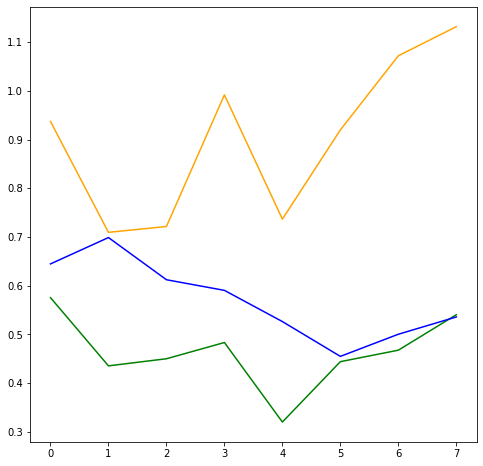

In [ ]:
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.subplots(figsize = (8,8))
NUM_SIM = 100
Cost_value = np.zeros((NUM_SIM,8,3))
Commands = np.zeros((NUM_SIM,8,3,NumIteration-1,6))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,30+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        Commands[num_sim,iter] = np.array([uILQG,uFL,uDLQG])
        Cost_value[num_sim,iter] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = 0)
Commands = np.mean(Commands,axis = 0)
colors = ["green","blue","orange"]

for i in range(3):
    plt.plot(np.arange(8),Cost_value[:,i],color = colors[i])
plt.show()

CHANGER COUT POUR INCLURE DT

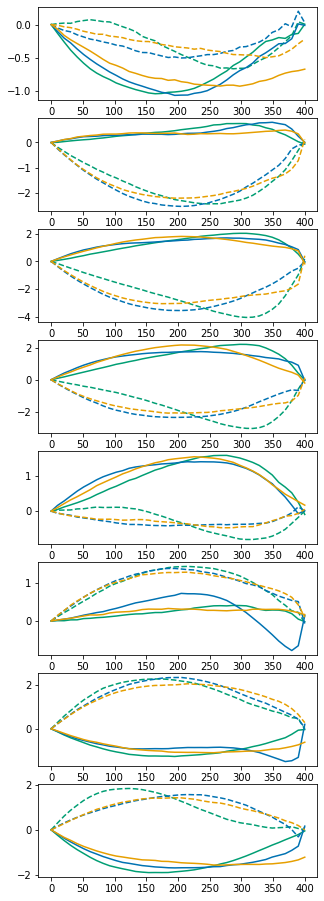

In [13]:
def Cost_function(x,u,w1 = 100,w2 = .05,r = .1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r * 0.01

def cf1(x,u,w1 = 100,w2 = 50,r = .3,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2

def cf2(x,u,w1 = 100,w2 = .05,r = .3,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w2*(omegas**2+omegae**2)

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,45]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(8,1,figsize = (5,16))
NUM_SIM = 10
Speeds = np.zeros((NUM_SIM,8,3,NumIteration,2))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,45+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,100,.05,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=100,w2=100,w3=.05,w4=.05,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = 100,w2 = 100,w3=.05,w4=.05,Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        Speeds[num_sim,iter] = [zilqg[:,2:4],xfl[:,2:4],z.T[:,2:4]]

colors = ["#009E73","#0072B2","#E69F00"]
Speeds = np.mean(Speeds,axis = 0)
for i in range(8):
    for j in range(3):
        ax[i].plot(Time,Speeds[i,j,:,0],color = colors[j])
        ax[i].plot(Time,Speeds[i,j,:,1],color = colors[j],linestyle = "--")
plt.show()

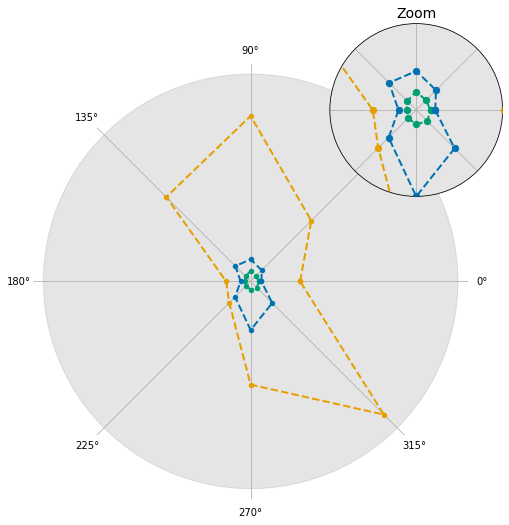

In [16]:
def Cost_function(x,u,w1 = 100,w2 = .05,r = .1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r * 0.01

def cf1(x,u,w1 = 100,w2 = 50,r = .3,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2

def cf2(x,u,w1 = 100,w2 = .05,r = .3,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w2*(omegas**2+omegae**2)

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,45]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(figsize = (8,8),subplot_kw={'projection': 'polar'})
NUM_SIM = 100
Cost_value = np.zeros((NUM_SIM,9,3))
Commands = np.zeros((NUM_SIM,8,3,NumIteration-1,6))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,45+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,100,.05,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=100,w2=100,w3=.05,w4=.05,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = 100,w2 = 100,w3=.05,w4=.05,Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        
        Commands[num_sim,iter] = np.array([uILQG,uFL,uDLQG])
        Cost_value[num_sim,iter] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = 0)
Commands = np.mean(Commands,axis = 0)
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
Cost_value[8] = Cost_value[0]

angles = np.linspace(0, 2*np.pi, 9)
for i in range(3):
    ax.scatter(angles, Cost_value[:,i], color=colors[i], s = 20, zorder = 10)
    ax.plot(angles, Cost_value[:,i], color=colors[i], linewidth=2,linestyle = "--",label = legend[i])
ax.set_yticks([])
# Create inset axes for zoomed region (e.g. zoom on theta from 1.2 to 1.6 rad)
inset_rect = [0.65, 0.65, 0.3, 0.3]  # [left, bottom, width, height] (fractions of figure)
inset_ax = fig.add_axes(inset_rect, projection='polar')
inset_ax.set_ylim(0, np.max(Cost_value[:,1]))
for i in range(3):
    inset_ax.scatter(angles, Cost_value[:,i], color=colors[i], s = 40, zorder = 10)
    inset_ax.plot(angles, Cost_value[:,i], color=colors[i], linewidth=2,linestyle = "--")
inset_ax.set_yticks([])
inset_ax.set_yticklabels([])
inset_ax.set_xticklabels([])
inset_ax.set_title("Zoom", fontsize=14)
ax.fill(np.linspace(0,2*pi,100),np.ones(100)*np.max(Cost_value)*1.1,color = "grey",alpha = .2)
inset_ax.fill(np.linspace(0,2*pi,100),np.ones(100)*10,color = "grey",alpha = .2)
ax.spines['polar'].set_visible(False)

plt.savefig("Costfunc.svg",dpi = 300)
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

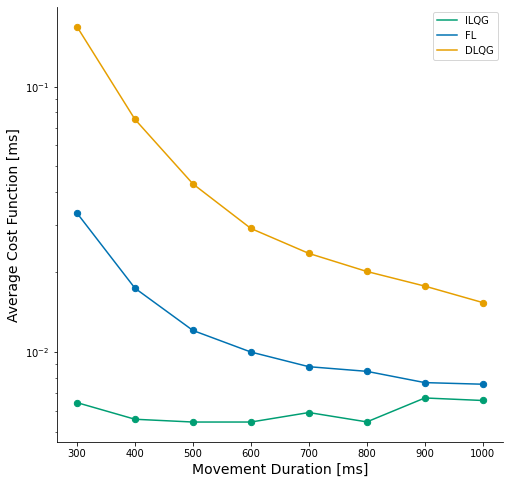

In [2]:
def Cost_function(x,u,w1 = 100,w2 = .05,r = .1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r * 0.01

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,45]

fig,ax = plt.subplots(figsize = (8,8))
NUM_SIM = 100
DURATIONS = [.3,.4,.5,.6,.7,.8,.9,1]
DURATIONS_ms = [300,400,500,600,700,800,900,1000]
Cost_value = np.zeros((NUM_SIM,9,3,len(DURATIONS)))
for m_idx,mov_t in enumerate(DURATIONS) :
    NumIteration = int(mov_t * 100)
    for num_sim in range(NUM_SIM):
        for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
            tg = [cos(angles)*15,45+sin(angles)*15]
            xILQG,yILQG,zilqg,uILQG=ILQG(mov_t,100,.05,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
            xFL,yFL,xfl,uFL = FL_6muscles(Duration=mov_t,w1=100,w2=100,w3=.05,w4=.05,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
            xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = 100,w2 = 100,w3=.05,w4=.05,Duration=mov_t,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
            Cost_value[num_sim,iter,:,m_idx] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = (0,1))
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
for i in range(3):
    plt.plot(DURATIONS_ms,Cost_value[i],color = colors[i],label = legend[i])
    plt.scatter(DURATIONS_ms,Cost_value[i],color = colors[i],s = 40)
plt.legend()
delete_axis(plt.gca(),sides = ["top","right"])
plt.yscale("log")
plt.xlabel("Movement Duration [ms]",fontsize = 14)
plt.ylabel("Average Cost Function [ms]",fontsize = 14)
plt.savefig("Movement_time.svg",dpi = 300)


c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

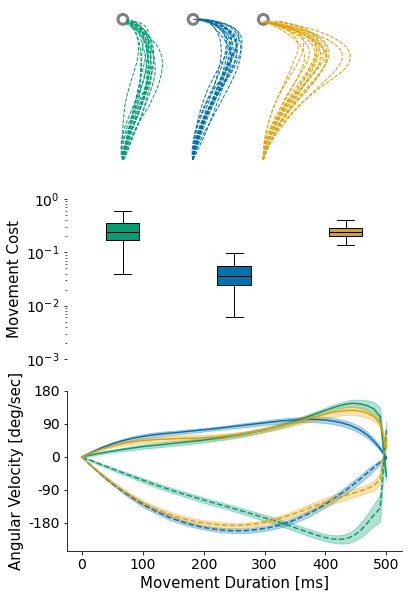

In [ ]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,40]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(3,figsize = (6,10))
NUM_SIM = 100
Cost_value = np.zeros((NUM_SIM,3))
Velocities = np.zeros((NUM_SIM,3,2,NumIteration))
tg = [0,60]
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05
WR = .1

def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * .01

def Compute_Cartesian_Speed(X, Y, dt):
    V = np.zeros(X.shape)
    Vx = np.diff(X) / dt
    Vy = np.diff(Y) / dt
    V[1:] = np.sqrt(Vx * Vx + Vy * Vy)
    return V

for i in range(NUM_SIM):
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  True)
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = True)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=MovementTime,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = True)
    if i <= 15: 
        ax[0].plot(xILQG,yILQG, color=colors[0], linewidth=1,linestyle = "--")
        ax[0].plot(xFL+10,yFL, color=colors[1], linewidth=1,linestyle = "--")
        ax[0].plot(xLQG+20,yLQG, color=colors[2], linewidth=1,linestyle = "--")
    Velocities[i,0] = zilqg[:,2:4].T
    Velocities[i,1] = xfl[:,2:4].T
    Velocities[i,2] = z.T[:,2:4].T
        
    Cost_value[i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]


#ax[0,0].plot(np.linspace(-3, 2, 100), np.ones(100) * 46, color="black")
#ax[0,0].plot(np.ones(100) * -3, np.linspace(46, 51, 100), color="black")
#ax[0,0].text(-3 + 1, 46 + 1, str(5) + " cm", fontsize=15)
for i in range(3):
    mean_vel = np.mean(Velocities[:,i,0],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,0],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i])
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    mean_vel = np.mean(Velocities[:,i,1],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,1],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i],linestyle = "--")
    #ax[2,i].set_ylim(-4,3)
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    delete_axis(ax[2],sides = ["top","right"])
    ax[2].set_xlabel("Movement Duration [ms]" , fontsize = 15)
    ax[2].set_xticks([0,100,200,300,400,500],labels = [0,100,200,300,400,500],fontsize = 14)
    ax[2].set_ylabel("Angular Velocity [deg/sec]" , fontsize = 15)
    ax[2].set_yticks([-180,-90,0,90,180],labels = [-180,-90,0,90,180],fontsize = 14)
    #ax[0,i].set_xlim(-2,6)
    ax[1].set_yscale('log') 
#parts = ax[1].boxplot(Cost_value[:,i],patch_artist=True,  # Needed to fill boxes with color
#        boxprops=dict(facecolor=colors[i], color='black'),
#        medianprops=dict(color='black'),
#        whiskerprops=dict(color='black'),
#        capprops=dict(color='black'),showfliers=False)

box = ax[1].boxplot(Cost_value, patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


ax[1].set_ylim(.001,1)
ax[0].set_aspect("equal")
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_xticks([])
delete_axis(ax[0])
delete_axis(ax[1])
    #ax[1,i].set_xticklabels([legend[i]],fontsize = 15)
for i in range(1,3):
    ax[1].set_yticks([])

ax[1].set_yticks([.001,.01,.1,1])
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylabel("Movement Cost",fontsize = 15)
for i in range(3): 
    circle = plt.Circle((0+10*i,60), .7, edgecolor='grey', facecolor='white', linewidth=3)

# Add square to plot
    ax[0].add_patch(circle)
    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
plt.savefig("Perturbed.svg",dpi = 300)
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

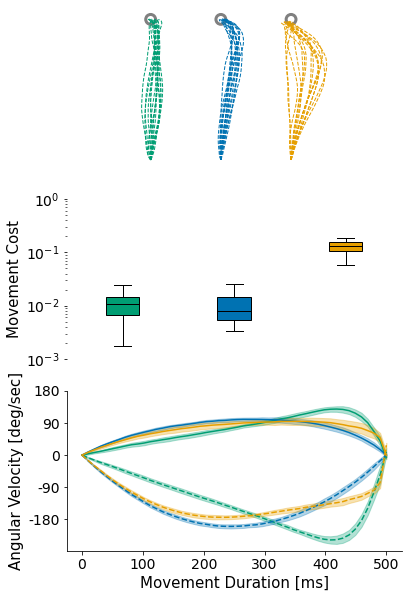

In [ ]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,40]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(3,figsize = (6,10))
NUM_SIM = 30
Cost_value = np.zeros((NUM_SIM,3))
Velocities = np.zeros((NUM_SIM,3,2,NumIteration))
tg = [0,60]
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05
WR = .1

def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * .01

def Compute_Cartesian_Speed(X, Y, dt):
    V = np.zeros(X.shape)
    Vx = np.diff(X) / dt
    Vy = np.diff(Y) / dt
    V[1:] = np.sqrt(Vx * Vx + Vy * Vy)
    return V

for i in range(NUM_SIM):
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  True,ff_power=.1)
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = True,ff_power=.1)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=MovementTime,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = True,ff_power=.1)
    if i <= 15: 
        ax[0].plot(xILQG,yILQG, color=colors[0], linewidth=1,linestyle = "--")
        ax[0].plot(xFL+10,yFL, color=colors[1], linewidth=1,linestyle = "--")
        ax[0].plot(xLQG+20,yLQG, color=colors[2], linewidth=1,linestyle = "--")
    Velocities[i,0] = zilqg[:,2:4].T
    Velocities[i,1] = xfl[:,2:4].T
    Velocities[i,2] = z.T[:,2:4].T
        
    Cost_value[i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]


#ax[0,0].plot(np.linspace(-3, 2, 100), np.ones(100) * 46, color="black")
#ax[0,0].plot(np.ones(100) * -3, np.linspace(46, 51, 100), color="black")
#ax[0,0].text(-3 + 1, 46 + 1, str(5) + " cm", fontsize=15)
for i in range(3):
    mean_vel = np.mean(Velocities[:,i,0],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,0],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i])
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    mean_vel = np.mean(Velocities[:,i,1],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,1],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i],linestyle = "--")
    #ax[2,i].set_ylim(-4,3)
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    delete_axis(ax[2],sides = ["top","right"])
    ax[2].set_xlabel("Movement Duration [ms]" , fontsize = 15)
    ax[2].set_xticks([0,100,200,300,400,500],labels = [0,100,200,300,400,500],fontsize = 14)
    ax[2].set_ylabel("Angular Velocity [deg/sec]" , fontsize = 15)
    ax[2].set_yticks([-180,-90,0,90,180],labels = [-180,-90,0,90,180],fontsize = 14)
    #ax[0,i].set_xlim(-2,6)
    ax[1].set_yscale('log') 
#parts = ax[1].boxplot(Cost_value[:,i],patch_artist=True,  # Needed to fill boxes with color
#        boxprops=dict(facecolor=colors[i], color='black'),
#        medianprops=dict(color='black'),
#        whiskerprops=dict(color='black'),
#        capprops=dict(color='black'),showfliers=False)

box = ax[1].boxplot(Cost_value, patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


ax[1].set_ylim(.001,1)
ax[0].set_aspect("equal")
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_xticks([])
delete_axis(ax[0])
delete_axis(ax[1])
    #ax[1,i].set_xticklabels([legend[i]],fontsize = 15)
for i in range(1,3):
    ax[1].set_yticks([])

ax[1].set_yticks([.001,.01,.1,1])
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylabel("Movement Cost",fontsize = 15)
for i in range(3): 
    circle = plt.Circle((0+10*i,60), .7, edgecolor='grey', facecolor='white', linewidth=3)

# Add square to plot
    ax[0].add_patch(circle)
    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
#plt.savefig("Perturbed.svg",dpi = 300)
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

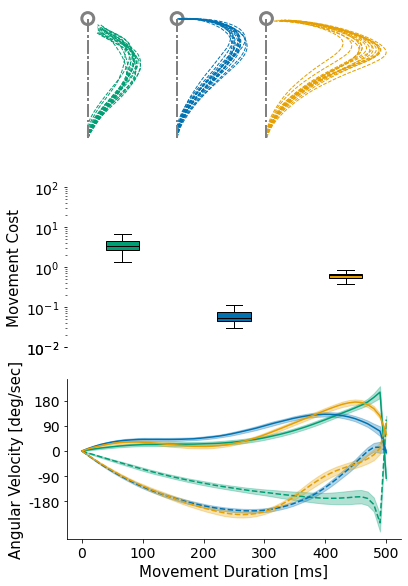

In [1]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st = [0,40]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax = plt.subplots(3,figsize = (6,10))
NUM_SIM = 100
Cost_value = np.zeros((NUM_SIM,3))
Velocities = np.zeros((NUM_SIM,3,2,NumIteration))
tg = [0,60]
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05
WR = .1

def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * .01

def Compute_Cartesian_Speed(X, Y, dt):
    V = np.zeros(X.shape)
    Vx = np.diff(X) / dt
    Vy = np.diff(Y) / dt
    V[1:] = np.sqrt(Vx * Vx + Vy * Vy)
    return V

for i in range(NUM_SIM):
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  True,ff_power=.6)
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-9,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = True,ff_power=.6)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=MovementTime,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = True,ff_power=.6)
    if i <= 15: 
        ax[0].plot(xILQG,yILQG, color=colors[0], linewidth=1,linestyle = "--")
        ax[0].plot(xFL+15,yFL, color=colors[1], linewidth=1,linestyle = "--")
        ax[0].plot(xLQG+30,yLQG, color=colors[2], linewidth=1,linestyle = "--")
        ax[0].plot(np.zeros(100),np.linspace(40,60,100),color = "grey",linestyle = "-.",linewidth = 2)
        ax[0].plot(np.zeros(100)+15,np.linspace(40,60,100),color = "grey",linestyle = "-.",linewidth = 2)
        ax[0].plot(np.zeros(100)+30,np.linspace(40,60,100),color = "grey",linestyle = "-.",linewidth = 2)
    Velocities[i,0] = zilqg[:,2:4].T
    Velocities[i,1] = xfl[:,2:4].T
    Velocities[i,2] = z.T[:,2:4].T
        
    Cost_value[i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]


#ax[0,0].plot(np.linspace(-3, 2, 100), np.ones(100) * 46, color="black")
#ax[0,0].plot(np.ones(100) * -3, np.linspace(46, 51, 100), color="black")
#ax[0,0].text(-3 + 1, 46 + 1, str(5) + " cm", fontsize=15)
for i in range(3):
    mean_vel = np.mean(Velocities[:,i,0],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,0],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i])
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    mean_vel = np.mean(Velocities[:,i,1],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,1],axis = 0)*180/pi
    # Pot mean line
    ax[2].plot(Time, mean_vel, color=colors[i],linestyle = "--")
    #ax[2,i].set_ylim(-4,3)
    # Pot standard deviation band
    ax[2].fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    delete_axis(ax[2],sides = ["top","right"])
    ax[2].set_xlabel("Movement Duration [ms]" , fontsize = 15)
    ax[2].set_xticks([0,100,200,300,400,500],labels = [0,100,200,300,400,500],fontsize = 14)
    ax[2].set_ylabel("Angular Velocity [deg/sec]" , fontsize = 15)
    ax[2].set_yticks([-180,-90,0,90,180],labels = [-180,-90,0,90,180],fontsize = 14)
    #ax[0,i].set_xlim(-2,6)
    ax[1].set_yscale('log') 
#parts = ax[1].boxplot(Cost_value[:,i],patch_artist=True,  # Needed to fill boxes with color
#        boxprops=dict(facecolor=colors[i], color='black'),
#        medianprops=dict(color='black'),
#        whiskerprops=dict(color='black'),
#        capprops=dict(color='black'),showfliers=False)

box = ax[1].boxplot(Cost_value, patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


ax[1].set_ylim(.01,100)
ax[0].set_aspect("equal")
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_xticks([])
delete_axis(ax[0])
delete_axis(ax[1])
    #ax[1,i].set_xticklabels([legend[i]],fontsize = 15)
for i in range(1,3):
    ax[1].set_yticks([])

ax[1].set_yticks([.01,.01,.1,1,10,100])
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylabel("Movement Cost",fontsize = 15)
for i in range(3): 
    circle = plt.Circle((0+15*i,60), 1, edgecolor='grey', facecolor='white', linewidth=3)

# Add square to plot
    ax[0].add_patch(circle)
    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
plt.savefig("Perturbed06.svg",dpi = 300)
plt.show()

Solution found at iteration  13


c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

Solution found at iteration  13


c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

Solution found at iteration  11


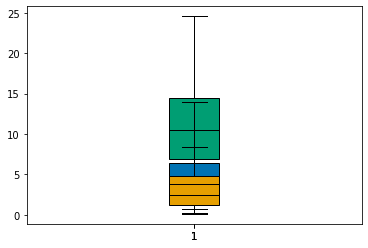

In [18]:
import sys
sys.path.append('..')
from Controllers.ILQG6Muscles import *



def Linearization_6muscles(x, u):
    """
    Parameters :
        - x : the state of the system
        - alpha : the body tilt

    return :
        The Jacobian Matrix of the dynamic of the system around the state x
    """

    theta1, theta2, dtheta1, dtheta2 = x[:4]
    C = np.array(
        [
            -dtheta2 * (2 * dtheta1 + dtheta2) * a2 * np.sin(theta2),
            dtheta1**2 * a2 * np.sin(theta2),
        ]
    )

    dCdte = np.array(
        [
            -dtheta2 * (2 * dtheta1 + dtheta2) * a2 * np.cos(theta2),
            dtheta1**2 * a2 * np.cos(theta2),
        ]
    )
    dCdos = np.array(
        [-dtheta2 * 2 * a2 * np.sin(theta2), 2 * dtheta1 * a2 * np.sin(theta2)]
    )
    dCdoe = np.array([(-2 * dtheta1 - 2 * dtheta2) * a2 * np.sin(theta2), 0])

    # Inertia matrix
    M = np.array(
        [
            [a1 + 2 * a2 * np.cos(theta2), a3 + a2 * np.cos(theta2)],
            [a3 + a2 * np.cos(theta2), a3],
        ]
    )

    Minv = np.linalg.inv(M)

    dM = np.array(
        [[-2 * a2 * np.sin(theta2), -a2 * np.sin(theta2)], [-a2 * np.sin(theta2), 0]]
    )

    A = np.array([[2, -2, 0, 0, 1.5, -2], [0, 0, 2, -2, 2, -1.5]])

    l0 = np.array([7.32, 3.26, 6.4, 4.26, 5.95, 4.04])
    theta0 = np.array(
        [
            [
                2 * pi / 360 * 15,
                2 * pi / 360 * 4.88,
                0,
                0,
                2 * pi / 360 * 4.5,
                2 * pi / 360 * 2.12,
            ],
            [
                0,
                0,
                2 * pi / 360 * 80.86,
                2 * pi / 360 * 109.32,
                2 * pi / 360 * 92.96,
                2 * pi / 360 * 91.52,
            ],
        ]
    )
    l = 1 + A[0] * (theta0[0] - x[0]) / l0 + A[1] * (theta0[1] - x[1]) / l0
    dldts = -A[0] / l0
    dldte = -A[1] / l0

    v = A[0] * (-x[2]) / l0 + A[1] * (-x[3]) / l0
    dvdos = -A[0] / l0
    dvdoe = -A[1] / l0
    # Equation (6): fl(l)
    fl = np.exp(np.abs((l**1.55 - 1) / 0.81))

    dfldl = (
        np.exp(np.abs((l**1.55 - 1) / 0.81))
        * np.sign((l**1.55 - 1) / 0.81)
        * (1.55 * l**0.55 / 0.81)
    )
    # Equation (7): ff_v(l, v)
    fv = np.where(
        v <= 0,
        (-7.39 - v) / (-7.39 + (-3.21 + 4.17) * v),
        (0.62 - (-3.12 + 4.21 * l - 2.67 * l**2) * v) / (0.62 + v),
    )
    dfvdl = np.where(v <= 0, 0, v * (-4.21 + 5.34 * l) / (0.62 + v))

    dfvdv = np.where(
        v <= 0,
        7.39 * (1 + 0.96) / (-7.39 + 0.96 * v) ** 2,
        -0.62 * (-3.12 + 4.21 * l - 2.67 * l**2 + 1) / (0.62 + v) ** 2,
    )

    dfldts = dfldl * dldts
    dfldte = dfldl * dldte
    dfvdts = dfvdl * dldts
    dfvdte = dfvdl * dldte
    dfvdos = dfvdv * dvdos
    dfvdoe = dfvdv * dvdoe

    # Compute acceleration dependencies
    dtheta = np.array([dtheta1, dtheta2])

    d_accel_theta1 = Minv @ (A @ (u * (dfldts * fv + fl * dfvdts)))
    d_accel_dtheta1 = Minv @ (A @ (u * dfvdos * fl) - dCdos - Bvisc @ np.array([1, 0]))
    d_accel_theta2 = -Minv @ (
        dM @ Minv @ (A @ (u * fl * fv) - C - Bvisc @ dtheta)
    ) + Minv @ (A @ (u * (dfldte * fv + fl * dfvdte)) - dCdte)
    d_accel_dtheta2 = Minv @ (A @ (u * dfvdoe * fl) - dCdoe - Bvisc @ np.array([0, 1]))

    # Construct the Jacobian matrix
    A = np.zeros((4, 4))

    A[0, 2] = 1
    A[1, 3] = 1

    # Acceleration contributions
    A[2, 0] = d_accel_theta1[0]
    A[2, 2] = d_accel_dtheta1[0]
    A[2, 1] = d_accel_theta2[0]
    A[2, 3] = d_accel_dtheta2[0]

    A[3, 0] = d_accel_theta1[1]
    A[3, 2] = d_accel_dtheta1[1]
    A[3, 1] = d_accel_theta2[1]
    A[3, 3] = d_accel_dtheta2[1]

    return A

def fu(x, u):
    Denominator = a3 * (a1 - a3) - a2**2 * np.cos(x[1]) ** 2
    Minv = np.array(
        [
            [a3 / Denominator, (-a2 * np.cos(x[1]) - a3) / Denominator],
            [
                (-a2 * np.cos(x[1]) - a3) / Denominator,
                (2 * a2 * np.cos(x[1]) + a1) / Denominator,
            ],
        ]
    )
    A = np.array([[2, -2, 0, 0, 1.5, -2], [0, 0, 2, -2, 2, -1.5]])

    l0 = np.array([7.32, 3.26, 6.4, 4.26, 5.95, 4.04])
    theta0 = np.array(
        [
            [
                2 * pi / 360 * 15,
                2 * pi / 360 * 4.88,
                0,
                0,
                2 * pi / 360 * 4.5,
                2 * pi / 360 * 2.12,
            ],
            [
                0,
                0,
                2 * pi / 360 * 80.86,
                2 * pi / 360 * 109.32,
                2 * pi / 360 * 92.96,
                2 * pi / 360 * 91.52,
            ],
        ]
    )
    l = 1 + A[0] * (theta0[0] - x[0]) / l0 + A[1] * (theta0[1] - x[1]) / l0
    v = A[0] * (-x[2]) / l0 + A[1] * (-x[3]) / l0
    # Equation (6): fl(l)
    fl = np.exp(np.abs((l**1.55 - 1) / 0.81))
    # Equation (7): ff_v(l, v)
    fv = np.where(
        v <= 0,
        (-7.39 - v) / (-7.39 + (-3.21 + 4.17) * v),
        (0.62 - (-3.12 + 4.21 * l - 2.67 * l**2) * v) / (0.62 + v),
    )
    sol = np.zeros((4, 6))
    for i in range(6):
        du = np.zeros(6)
        du[i] = 1
        sol[2:, i] = Minv @ (A @ (du * fl * fv))
    return sol
colors = ["orange","blue","green"]
for idx,mt in enumerate(np.array([.3,.5,.8])):
    
    st = [0,40]
    NumIteration = int(mt*100)
    Time = np.linspace(0,1,NumIteration)
    NUM_SIM = 1
    Cost_value = np.zeros((NUM_SIM,3))
    tg = [0,60]
    colors = ["#009E73","#0072B2","#E69F00"]
    legend = ["ILQG","FL","DLQG"]

    WP = 100
    WV = .05
    WR = .1
    dt = .01
    
    errors = np.zeros((NUM_SIM,NumIteration-1,2))
    for i in range(NUM_SIM):
        xILQG,yILQG,zilqg,uILQG=ILQG(mt,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=True,FF = True,ff_power=.6)
        for j in range(NumIteration-1):
            
            A = np.identity(4) + dt * Linearization_6muscles(zilqg[j], uILQG[j])
            B = dt * fu(zilqg[j], uILQG[j])
            x_pred = A@zilqg[j] + B@uILQG[j]
            errors[i,j] = np.abs(zilqg[j+1,2:4]-x_pred[2:4])*180/pi
    #plt.plot(Time[:49],means/np.max(means))
    error_means = np.mean(errors,axis = 0)
    box = plt.boxplot(error_means[:,0],patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

    box["boxes"][0].set_facecolor(colors[idx])


d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary pa

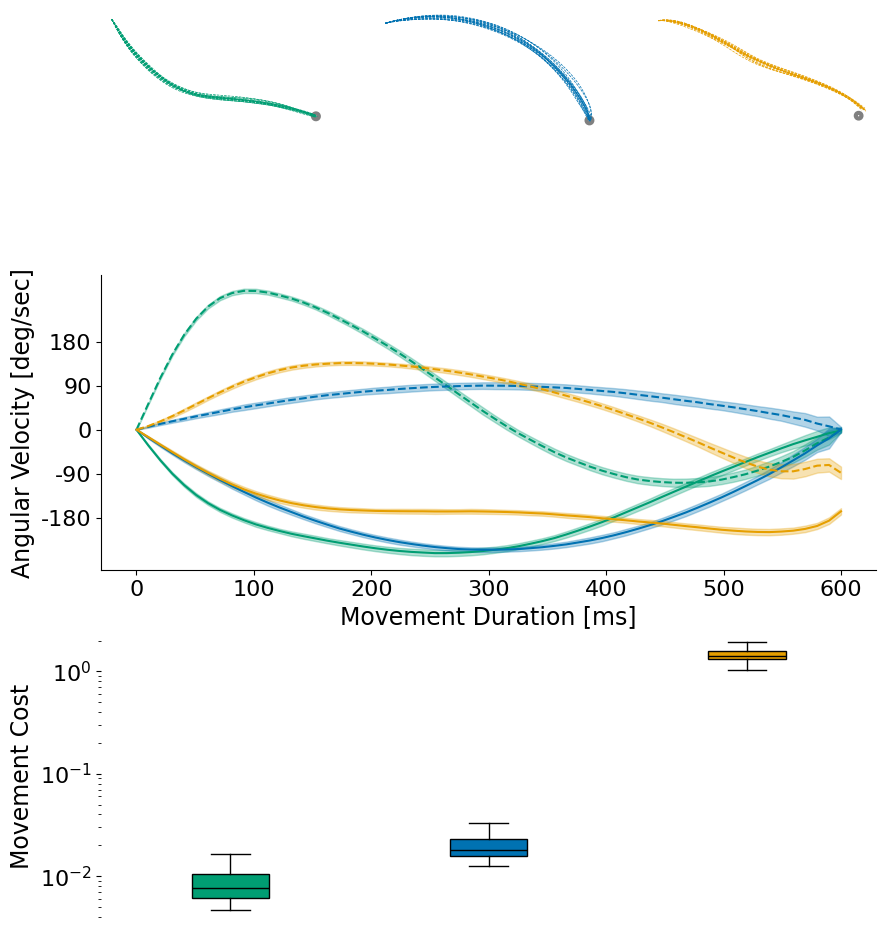

In [85]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st,tg = longmovement_2()
st = ToCartesian(np.array([75,75]) * pi / 180)
tg = ToCartesian(np.array([-21.73, 110]) * pi / 180)



MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig= plt.figure(figsize = (10,13))
gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])  # 1ère ligne, 1ère colonne
ax2 = fig.add_subplot(gs[0, 1])  # 1ère ligne, 2ème colonne
ax3 = fig.add_subplot(gs[0, 2])  # 1ère ligne, 3ème colonne

# 1 graphique en bas qui prend toute la ligne
ax4 = fig.add_subplot(gs[1, :])
ax5= fig.add_subplot(gs[2, :])
NUM_SIM = 100
MV = 1e-3
Cost_value = np.zeros((NUM_SIM,3))
Velocities = np.zeros((NUM_SIM,3,2,NumIteration))
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05
WR = .1
def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * MovementTime/NumIteration


for i in range(NUM_SIM):
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  False,motornoise_variance=MV)
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = False,motornoise_variance=MV)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=MovementTime,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = False,motornoise_variance=MV)
    if i <= 15: 
        ax1.plot(xILQG,yILQG, color=colors[0], linewidth=.5,linestyle = "--")
        ax2.plot(xFL,yFL, color=colors[1], linewidth=.5,linestyle = "--")
        ax3.plot(xLQG,yLQG, color=colors[2], linewidth=.5,linestyle = "--")
    Velocities[i,0] = zilqg[:,2:4].T
    Velocities[i,1] = xfl[:,2:4].T
    Velocities[i,2] = z.T[:,2:4].T
        
    Cost_value[i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]

for i in range(3):
    mean_vel = np.mean(Velocities[:,i,0],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,0],axis = 0)*180/pi
    # Pot mean line
    ax4.plot(Time, mean_vel, color=colors[i])
    # Pot standard deviation band
    ax4.fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    mean_vel = np.mean(Velocities[:,i,1],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,1],axis = 0)*180/pi
    # Pot mean line
    ax4.plot(Time, mean_vel, color=colors[i],linestyle = "--")
    #ax[2,i].set_ylim(-4,3)
    # Pot standard deviation band
    ax4.fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    delete_axis(ax4,sides = ["top","right"])
    ax4.set_xlabel("Movement Duration [ms]" , fontsize = 17)
    ax4.set_xticks([0,100,200,300,400,500,600],labels = [0,100,200,300,400,500,600],fontsize = 16)
    ax4.set_ylabel("Angular Velocity [deg/sec]" , fontsize = 17)
    ax4.set_yticks([-180,-90,0,90,180],labels = [-180,-90,0,90,180],fontsize = 16)
    #ax[0,i].set_xlim(-2,6)
    ax5.set_yscale('log') 
#parts = ax[1].boxplot(Cost_value[:,i],patch_artist=True,  # Needed to fill boxes with color
#        boxprops=dict(facecolor=colors[i], color='black'),
#        medianprops=dict(color='black'),
#        whiskerprops=dict(color='black'),
#        capprops=dict(color='black'),showfliers=False)

box = ax5.boxplot(Cost_value, patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


for ax in [ax1,ax2,ax3]:
    ax.set_aspect("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    delete_axis(ax)
    circle = plt.Circle((tg[0],tg[1]), .7, edgecolor='grey', facecolor='white', linewidth=3)
    ax.add_patch(circle)
ax5.set_xticks([])

delete_axis(ax5)
    #ax[1,i].set_xticklabels([legend[i]],fontsize = 15)


ax5.tick_params(axis='y', labelsize=16)
ax5.set_ylabel("Movement Cost",fontsize = 17)

# Add square to plot

    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
plt.savefig("Long2.svg",dpi = 300)
plt.show()

In [83]:
st = ToCartesian(np.array([75,75]) * pi / 180)
tg = ToCartesian(np.array([-21.73, 110]) * pi / 180)

print(np.sqrt((st[1]-tg[1])**2+(st[0]-tg[0])**2))

54.99930300301801


d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:540: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG6Muscles.py:543: ComplexWarning: Casting complex values to real discards the imaginary pa

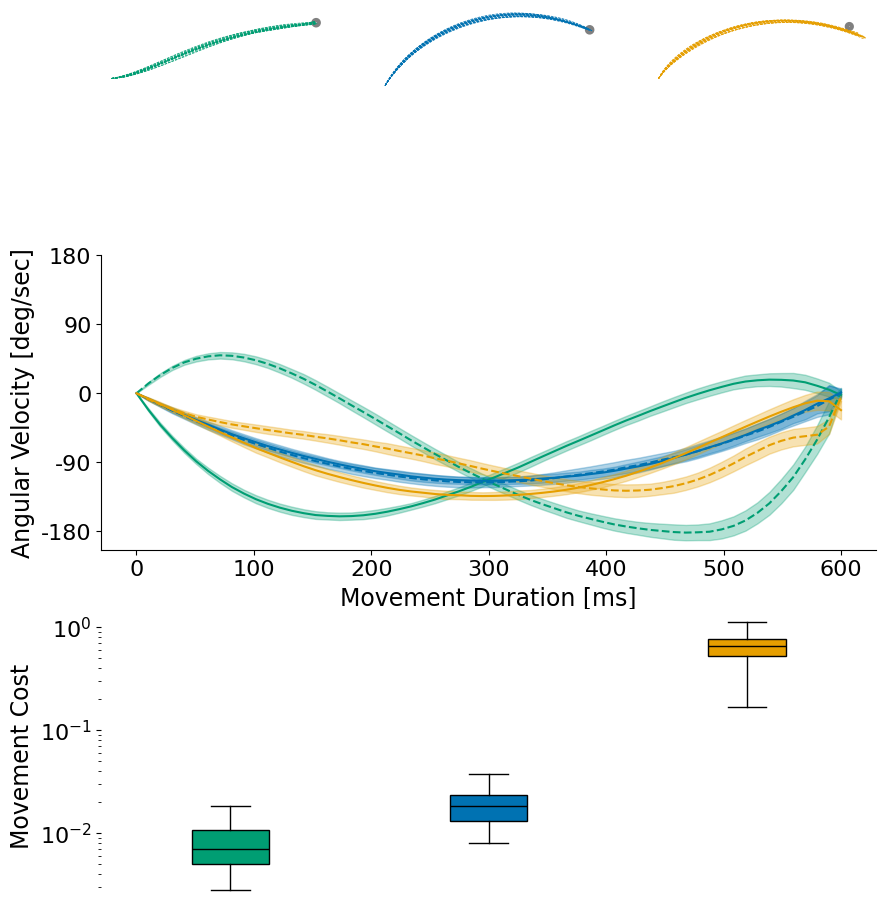

In [86]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st,tg = longmovement_1()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

fig= plt.figure(figsize = (10,13))
gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])  # 1ère ligne, 1ère colonne
ax2 = fig.add_subplot(gs[0, 1])  # 1ère ligne, 2ème colonne
ax3 = fig.add_subplot(gs[0, 2])  # 1ère ligne, 3ème colonne

# 1 graphique en bas qui prend toute la ligne
ax4 = fig.add_subplot(gs[1, :])
ax5= fig.add_subplot(gs[2, :])
NUM_SIM = 100
MV = 1e-3
Cost_value = np.zeros((NUM_SIM,3))
Velocities = np.zeros((NUM_SIM,3,2,NumIteration))
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05
WR = .1
def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * MovementTime/NumIteration


for i in range(NUM_SIM):
    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  False,motornoise_variance=MV)
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = False,motornoise_variance=MV)
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=MovementTime,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = False,motornoise_variance=MV)
    if i <= 15: 
        ax1.plot(xILQG,yILQG, color=colors[0], linewidth=.5,linestyle = "--")
        ax2.plot(xFL,yFL, color=colors[1], linewidth=.5,linestyle = "--")
        ax3.plot(xLQG,yLQG, color=colors[2], linewidth=.5,linestyle = "--")
    Velocities[i,0] = zilqg[:,2:4].T
    Velocities[i,1] = xfl[:,2:4].T
    Velocities[i,2] = z.T[:,2:4].T
        
    Cost_value[i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]

for i in range(3):
    mean_vel = np.mean(Velocities[:,i,0],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,0],axis = 0)*180/pi
    # Pot mean line
    ax4.plot(Time, mean_vel, color=colors[i])
    # Pot standard deviation band
    ax4.fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    mean_vel = np.mean(Velocities[:,i,1],axis = 0)*180/pi
    std_vel = np.std(Velocities[:,i,1],axis = 0)*180/pi
    # Pot mean line
    ax4.plot(Time, mean_vel, color=colors[i],linestyle = "--")
    #ax[2,i].set_ylim(-4,3)
    # Pot standard deviation band
    ax4.fill_between(Time, mean_vel - std_vel, mean_vel + std_vel, color=colors[i], alpha=0.3)
    delete_axis(ax4,sides = ["top","right"])
    ax4.set_xlabel("Movement Duration [ms]" , fontsize = 17)
    ax4.set_xticks([0,100,200,300,400,500,600],labels = [0,100,200,300,400,500,600],fontsize = 16)
    ax4.set_ylabel("Angular Velocity [deg/sec]" , fontsize = 17)
    ax4.set_yticks([-180,-90,0,90,180],labels = [-180,-90,0,90,180],fontsize = 16)
    #ax[0,i].set_xlim(-2,6)
    ax5.set_yscale('log') 
#parts = ax[1].boxplot(Cost_value[:,i],patch_artist=True,  # Needed to fill boxes with color
#        boxprops=dict(facecolor=colors[i], color='black'),
#        medianprops=dict(color='black'),
#        whiskerprops=dict(color='black'),
#        capprops=dict(color='black'),showfliers=False)

box = ax5.boxplot(Cost_value, patch_artist=True,
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


for ax in [ax1,ax2,ax3]:
    ax.set_aspect("equal")
    ax.set_yticks([])
    ax.set_xticks([])
    delete_axis(ax)
    circle = plt.Circle((tg[0],tg[1]), .7, edgecolor='grey', facecolor='white', linewidth=3)
    ax.add_patch(circle)
ax5.set_xticks([])

delete_axis(ax5)
    #ax[1,i].set_xticklabels([legend[i]],fontsize = 15)


ax5.tick_params(axis='y', labelsize=16)
ax5.set_ylabel("Movement Cost",fontsize = 17)

# Add square to plot

    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
plt.savefig("Long.svg",dpi = 300)
plt.show()

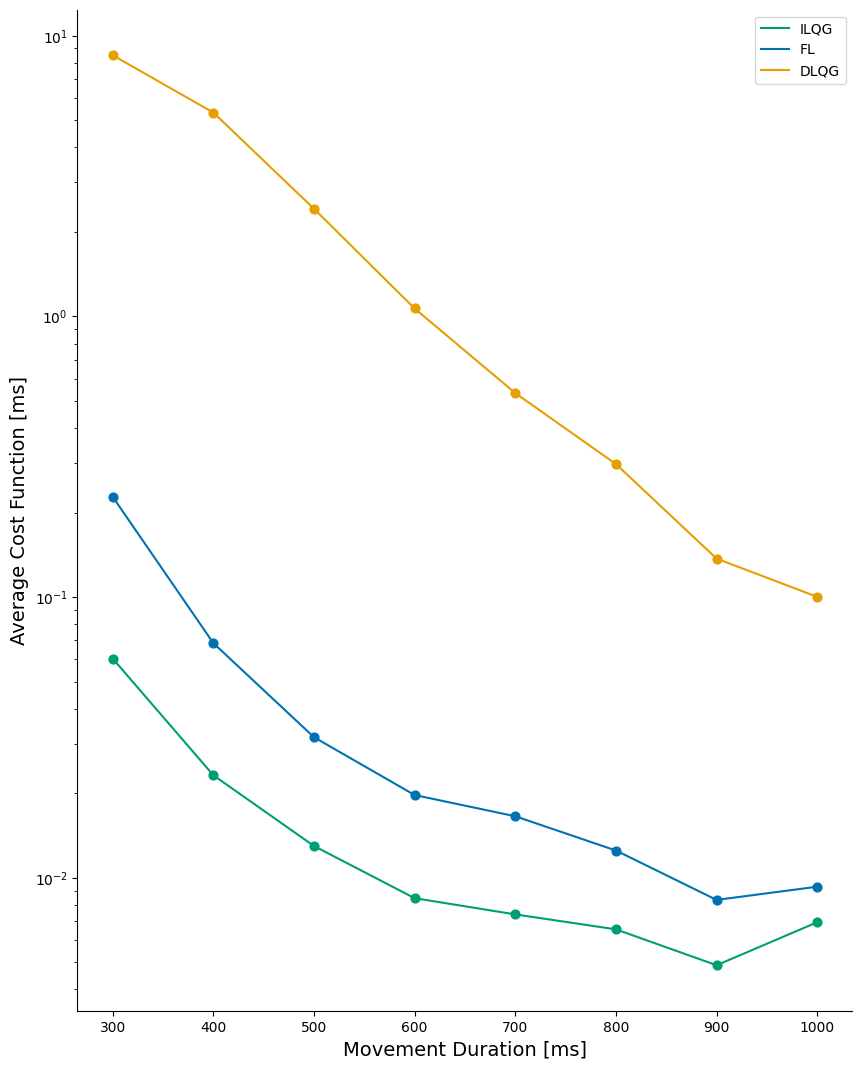

In [9]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
st,tg = longmovement_1()

Time = np.linspace(0,MovementTime*1000,NumIteration)

fig,ax= plt.subplots(figsize = (10,13))
DURATIONS_ms = [300,400,500,600,700,800,900,1000]
NUM_SIM = 100
Cost_value = np.zeros((8,NUM_SIM,3))
colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
WP = 100
WV = .05

WR = .1
def Cost_function(x,u,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    return WP*(thetas-target1)**2 + WP*(thetae-target2)**2 + WV*(omegas**2+omegae**2)+ np.sum(u*u) *WR * MovementTime/NumIteration

for idx,mt in enumerate(np.linspace(.3,1,8)):
    NumIteration = int(mt*100)
    for i in range(NUM_SIM):
        xILQG,yILQG,zilqg,uILQG=ILQG(mt,WP,WV,WR,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False,FF =  False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=mt,w1=WP,w2=WP,w3=WV,w4=WV,r=1e-8,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True,FF = False)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(w1 = WP,w2 = WP,w3 = WV,w4 = WV, Duration=mt,r1 = WR,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True,FF = False)
            
        Cost_value[idx,i]=[Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)]

Costs = np.mean(Cost_value,axis = 1)


colors = ["#009E73","#0072B2","#E69F00"]
legend = ["ILQG","FL","DLQG"]
for i in range(3):
    plt.plot(DURATIONS_ms,Costs[:,i],color = colors[i],label = legend[i])
    plt.scatter(DURATIONS_ms,Costs[:,i],color = colors[i],s = 40)
plt.legend()
delete_axis(plt.gca(),sides = ["top","right"])
plt.yscale("log")
plt.xlabel("Movement Duration [ms]",fontsize = 14)
plt.ylabel("Average Cost Function [ms]",fontsize = 14)

# Add square to plot

    
    #ax[0,i].scatter(tg[0],tg[1],marker = "s",s = 500,color = "grey")
plt.savefig("Longcost.svg",dpi = 300)
plt.show()